# Machine Learning Model on Sonar Dataset to discriminate between sonar signals bounced off a Metal Cylinder and those bounced off a roughly Cylindrical Rock.

In [29]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [30]:
#acquiring the data
sonar_df=pd.read_csv("sonar_data.csv",header=None)

In [31]:
#analysing the data
print(sonar_df.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')


In [32]:
#changing the column name
sonar_df = sonar_df.rename(columns={60: 'Target'})

#previewing the data
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [33]:
#previewing the data
sonar_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Target
59,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058,R
109,0.0264,0.0071,0.0342,0.0793,0.1043,0.0783,0.1417,0.1176,0.0453,0.0945,...,0.0214,0.0262,0.0177,0.0037,0.0068,0.0121,0.0077,0.0078,0.0066,M
61,0.0135,0.0045,0.0051,0.0289,0.0561,0.0929,0.1031,0.0883,0.1596,0.1908,...,0.0037,0.0084,0.0102,0.0096,0.0024,0.0037,0.0028,0.0030,0.0030,R
112,0.0454,0.0472,0.0697,0.1021,0.1397,0.1493,0.1487,0.0771,0.1171,0.1675,...,0.0120,0.0042,0.0238,0.0129,0.0084,0.0218,0.0321,0.0154,0.0053,M
31,0.0084,0.0153,0.0291,0.0432,0.0951,0.0752,0.0414,0.0259,0.0692,0.1753,...,0.0236,0.0114,0.0136,0.0117,0.0060,0.0058,0.0031,0.0072,0.0045,R


In [34]:
#checking the structure of the dataset
sonar_df.shape

(208, 61)

In [35]:
#class distribution
sonar_df.groupby("Target").size()

Target
M    111
R     97
dtype: int64

In [36]:
#checking for the datatypes of all the fields
sonar_df.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
56        float64
57        float64
58        float64
59        float64
Target     object
Length: 61, dtype: object

In [37]:
#extracting the general information from the dataset
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [38]:
#checking if any null values present in the dataset
sonar_df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
56        0
57        0
58        0
59        0
Target    0
Length: 61, dtype: int64

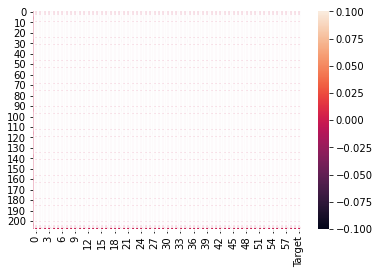

In [39]:
#visualizing the null values through heatmap
sns.heatmap(sonar_df.isnull(),annot=True)

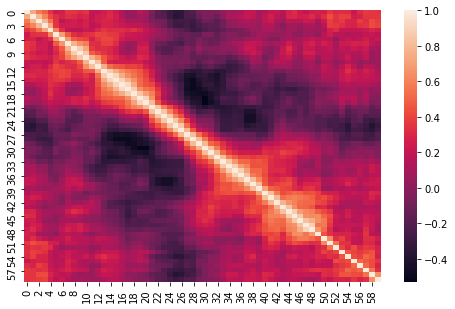

In [40]:
#checking for the correlation
corr_hmap=sonar_df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_hmap)
#plt.show()

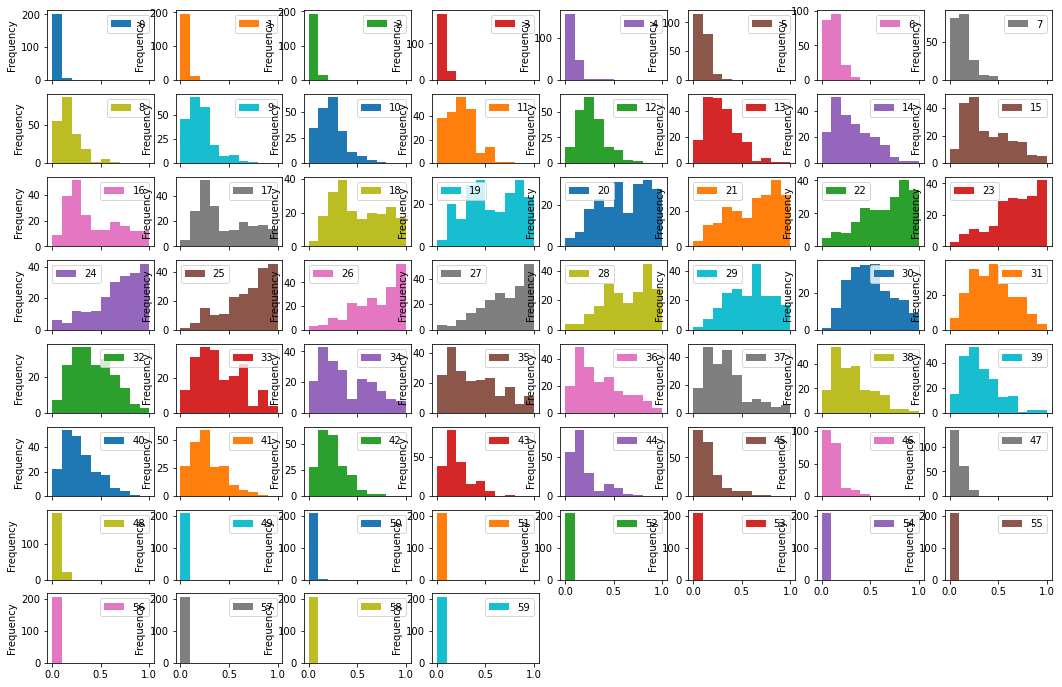

In [41]:
#multi-variant vizualization
sonar_df.plot(kind='hist', subplots=True, layout=(8,8),figsize=(18,12))
plt.show()

In [42]:
#checking the skewness before removing the outliers
sonar_df.skew()

0     2.131088
1     2.155644
2     2.652518
3     3.401697
4     2.018141
5     1.248166
6     0.970820
7     1.481107
8     1.633870
9     1.281258
10    0.987813
11    0.588681
12    0.736584
13    1.022369
14    0.763964
15    0.694671
16    0.654480
17    0.525845
18    0.283182
19   -0.085331
20   -0.252741
21   -0.392289
22   -0.594350
23   -0.691861
24   -0.788909
25   -0.671580
26   -0.627843
27   -0.615447
28   -0.442007
29   -0.132390
30    0.259797
31    0.313420
32    0.423864
33    0.563296
34    0.591654
35    0.619868
36    0.676994
37    1.033366
38    0.908835
39    0.861280
40    0.863526
41    0.860110
42    0.909317
43    1.235086
44    1.366839
45    1.706674
46    1.790155
47    1.277722
48    1.273385
49    1.761714
50    2.716060
51    2.093976
52    1.060572
53    1.093090
54    1.789946
55    1.780805
56    1.653090
57    2.098330
58    1.737506
59    2.775754
dtype: float64

In [43]:
#converting the Target values from categorical str to categorical int value
convertion={"Target":{"R": 1, "M": 2}}
sonar_df.replace(convertion, inplace=True)
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [44]:
#removing outliers
z_score=np.abs(zscore(sonar_df))
print(sonar_df.shape)
sonar_df_final=sonar_df.loc[(z_score<3).all(axis=1)]
print(sonar_df_final.shape)

(208, 61)
(168, 61)


In [45]:
#checking the skewness after removing the outliers
sonar_df_final.skew()

0         1.260141
1         1.305137
2         1.651471
3         1.237233
4         0.921870
            ...   
56        1.378156
57        1.364882
58        1.464334
59        1.144572
Target    0.000000
Length: 61, dtype: float64

In [46]:
#checking for the statastical report
sonar_df_final.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Target
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.023518,0.030290,0.035176,0.043747,0.066641,0.095901,0.110491,0.115680,0.155424,0.185860,...,0.011507,0.009385,0.009588,0.007992,0.007257,0.006888,0.006327,0.006610,0.005667,1.500000
std,0.014052,0.021525,0.025846,0.027553,0.041237,0.049633,0.047619,0.060332,0.084019,0.103403,...,0.006988,0.005942,0.006043,0.005489,0.004246,0.004610,0.004381,0.004637,0.003622,0.501495
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005700,0.011700,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,1.000000
25%,0.013000,0.013975,0.016875,0.023500,0.035775,0.063500,0.079325,0.073275,0.094700,0.104275,...,0.006475,0.004750,0.004775,0.003800,0.004175,0.003700,0.003275,0.003275,0.003000,1.000000
50%,0.020850,0.026800,0.029100,0.039400,0.059650,0.085450,0.102350,0.107450,0.142350,0.177200,...,0.009700,0.007900,0.008450,0.006850,0.006450,0.005600,0.005150,0.005650,0.004950,1.500000
75%,0.030850,0.042025,0.047450,0.056675,0.090525,0.123050,0.140275,0.149125,0.197625,0.252950,...,0.014925,0.012725,0.013025,0.010650,0.009700,0.009275,0.008775,0.008350,0.007550,2.000000
max,0.076200,0.121000,0.152600,0.149800,0.225200,0.261100,0.230400,0.348100,0.527600,0.596500,...,0.038600,0.026500,0.027100,0.029000,0.019800,0.024200,0.024400,0.024600,0.019800,2.000000


In [47]:
#Now separating input and output variable
print(sonar_df_final.dtypes)
x=sonar_df_final.drop(['Target'],axis=1)
y=sonar_df_final.select_dtypes(include=['int64']).copy()
print(x.shape)
print(y.shape)

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
56        float64
57        float64
58        float64
59        float64
Target      int64
Length: 61, dtype: object
(168, 60)
(168, 1)


In [48]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.25110137,  0.31733195,  0.29587634, ...,  0.47445549,
         0.51705689, -0.68321226],
       [ 1.55478911,  1.02560822,  1.90634545, ..., -0.32675022,
        -0.30487817, -0.35091891],
       [ 3.7604024 ,  1.69194707,  0.50155071, ..., -0.34964181,
         0.88476468,  1.03363669],
       ...,
       [ 2.0473047 ,  0.62487296, -0.66652447, ...,  1.71060145,
         0.23586858, -0.71090337],
       [ 0.48410305,  0.23345713,  0.53647655, ...,  0.35999753,
        -0.65095608, -0.24015447],
       [ 0.17717305,  0.28005426, -0.837273  , ..., -0.62434092,
        -0.11020934,  1.61515004]])

In [49]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [50]:
accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,151):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.9705882352941176
random state:  43  accuracy score:  0.7058823529411765
random state:  44  accuracy score:  0.7941176470588235
random state:  45  accuracy score:  0.7941176470588235
random state:  46  accuracy score:  0.7647058823529411
random state:  47  accuracy score:  0.8529411764705882
random state:  48  accuracy score:  0.8235294117647058
random state:  49  accuracy score:  0.8235294117647058
random state:  50  accuracy score:  0.8529411764705882
random state:  51  accuracy score:  0.7352941176470589
random state:  52  accuracy score:  0.7647058823529411
random state:  53  accuracy score:  0.8235294117647058
random state:  54  accuracy score:  0.7647058823529411
random state:  55  accuracy score:  0.8235294117647058
random state:  56  accuracy score:  0.7647058823529411
random state:  57  accuracy score:  0.8235294117647058
random state:  58  accuracy score:  0.7352941176470589
random state:  59  accuracy score:  0.7941176470588235
random 

random state:  89  accuracy score:  0.8235294117647058
random state:  90  accuracy score:  0.7941176470588235
random state:  91  accuracy score:  0.7352941176470589
random state:  92  accuracy score:  0.7941176470588235
random state:  93  accuracy score:  0.7941176470588235
random state:  94  accuracy score:  0.6470588235294118
random state:  95  accuracy score:  0.7352941176470589
random state:  96  accuracy score:  0.8235294117647058
random state:  97  accuracy score:  0.8529411764705882
random state:  98  accuracy score:  0.8823529411764706
random state:  99  accuracy score:  0.7352941176470589
random state:  100  accuracy score:  0.8823529411764706
random state:  101  accuracy score:  0.7941176470588235
random state:  102  accuracy score:  0.8823529411764706
random state:  103  accuracy score:  0.8235294117647058
random state:  104  accuracy score:  0.7058823529411765
random state:  105  accuracy score:  0.7058823529411765
random state:  106  accuracy score:  0.7941176470588235
ran

random state:  126  accuracy score:  0.6764705882352942
random state:  127  accuracy score:  0.6176470588235294
random state:  128  accuracy score:  0.8529411764705882
random state:  129  accuracy score:  0.7352941176470589
random state:  130  accuracy score:  0.6470588235294118
random state:  131  accuracy score:  0.7352941176470589
random state:  132  accuracy score:  0.7352941176470589
random state:  133  accuracy score:  0.5588235294117647
random state:  134  accuracy score:  0.6470588235294118
random state:  135  accuracy score:  0.7941176470588235
random state:  136  accuracy score:  0.7941176470588235
random state:  137  accuracy score:  0.7941176470588235
random state:  138  accuracy score:  0.6764705882352942
random state:  139  accuracy score:  0.6764705882352942
random state:  140  accuracy score:  0.6470588235294118
random state:  141  accuracy score:  0.6764705882352942
random state:  142  accuracy score:  0.5882352941176471
random state:  143  accuracy score:  0.676470588

random state:  64  accuracy score:  0.9705882352941176
random state:  65  accuracy score:  0.9117647058823529
random state:  66  accuracy score:  0.8529411764705882
random state:  67  accuracy score:  0.8235294117647058
random state:  68  accuracy score:  0.9117647058823529
random state:  69  accuracy score:  0.8823529411764706
random state:  70  accuracy score:  0.8529411764705882
random state:  71  accuracy score:  0.8529411764705882
random state:  72  accuracy score:  0.8823529411764706
random state:  73  accuracy score:  0.7647058823529411
random state:  74  accuracy score:  0.8823529411764706
random state:  75  accuracy score:  0.8235294117647058
random state:  76  accuracy score:  0.8529411764705882
random state:  77  accuracy score:  0.7941176470588235
random state:  78  accuracy score:  0.7352941176470589
random state:  79  accuracy score:  0.7941176470588235
random state:  80  accuracy score:  0.7941176470588235
random state:  81  accuracy score:  0.6764705882352942
random sta

In [51]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=15, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.7907407407407409
Cross Validation Score(Std):  0.13412828860912457

Model name:  KNN
Cross Validation Score(Mean):  0.8055555555555556
Cross Validation Score(Std):  0.13795985579399386

Model name:  DT
Cross Validation Score(Mean):  0.6861111111111112
Cross Validation Score(Std):  0.12399804193329902

Model name:  GNB
Cross Validation Score(Mean):  0.7537037037037038
Cross Validation Score(Std):  0.1776813009823849

Model name:  SVC
Cross Validation Score(Mean):  0.8583333333333335
Cross Validation Score(Std):  0.11787295246073501



In [52]:
#checking for the best results
result=pd.DataFrame({'Model':models,'Accuracy_Score':accuracy_results, 'Cross_Validation_Score':cvs})
result

,Model,Accuracy_Score,Cross_Validation_Score
0,"(LR, LogisticRegression())",97.058824,79.074074
1,"(KNN, KNeighborsClassifier())",94.117647,80.555556
2,"(DT, DecisionTreeClassifier())",94.117647,68.611111
3,"(GNB, GaussianNB())",91.176471,75.370370
4,"(SVC, SVC())",97.058824,85.833333


In [53]:
# Boosting methods
boosters=[]
boosters.append(('AB', AdaBoostClassifier()))
boosters.append(('GBM', GradientBoostingClassifier()))
boosters.append(('RF', RandomForestClassifier()))
boosters.append(('ET', ExtraTreesClassifier()))

In [54]:
results = []
names = []
for name, model in boosters:
    cv_results = cross_val_score(model, x_train, y_train, cv=15, scoring="accuracy")
    results.append(cv_results)
    names.append(name)    
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_results.mean())
    print("Cross Validation Score(Std): ",cv_results.std())
    print()

Model name:  AB
Cross Validation Score(Mean):  0.8055555555555555
Cross Validation Score(Std):  0.1379598557939939

Model name:  GBM
Cross Validation Score(Mean):  0.8046296296296297
Cross Validation Score(Std):  0.1283468273596136

Model name:  RF
Cross Validation Score(Mean):  0.8222222222222224
Cross Validation Score(Std):  0.13333333333333333

Model name:  ET
Cross Validation Score(Mean):  0.8592592592592594
Cross Validation Score(Std):  0.10317324649766015



In [55]:
#Choosing the Best Model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=64,test_size=0.20)
model_name=SVC()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
y_pred_model=model_name.predict(x_test)
accuracy_scr=accuracy_score(y_test,y_pred_model)
cfm=confusion_matrix(y_test,y_pred_model)
cr=classification_report(y_test,y_pred_model)
print("accuracy score: ",accuracy_scr)
print("confusion matrix: ")
print(cfm)
print("classification report: ")
print(cr)
print(y_pred_model)

accuracy score:  0.9705882352941176
confusion matrix: 
[[17  1]
 [ 0 16]]
classification report: 
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.94      1.00      0.97        16

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34

[2 1 1 2 1 2 2 1 2 1 1 2 2 2 1 2 1 2 2 2 1 2 2 1 2 1 1 1 2 1 1 1 2 1]


In [56]:
#saving the model as pickle in a file
pickle.dump(model_name,open('svc_sonar_data.pkl','wb'))

In [57]:
#loading the model for testing
loaded_model=pickle.load(open('svc_sonar_data.pkl','rb'))
loaded_model.predict(x_test)

array([2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64)